In [1]:
import sys
sys.path.insert(0, '../../src')
from utils import preprocession as prep
from utils.metrics import compute_metric
from utils import visualization as vis

import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import decomposition as mf

from tqdm.notebook import tqdm

## Load Data

In [2]:
folder_name = 'Smartvote'
train, test = prep.load_data(folder_name, 'Binary')
train_users, train_reactions = train
test_users, test_reactions = test

In [3]:
p=0
data = prep.impute_dataframe(train_reactions[p])

## PCA

 Fit Accuracy: 0.8233127825729551
 Fit RMSE: 0.3542333889967265
 Imputation Accuracy: nan
 Imputation RMSE: nan



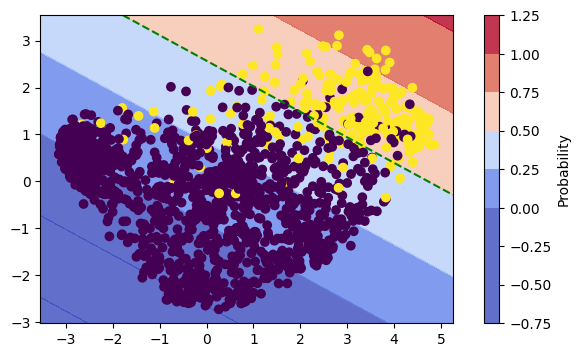

In [4]:
pca = mf.PCA(n_components=2).fit(data)
X = pca.transform(data)
V = pca.components_

def predict(params, answers):
    return pca.inverse_transform(params)[:,[int(s) for s in answers]]

predictions = pd.DataFrame(predict(X, data.columns),
                           index=data.index, columns=data.columns)
_ = compute_metric(predictions, train_reactions[0], train_reactions[p].isna().values)

q = 5

fig, ax = plt.subplots(figsize=(8,4))
ax = vis.plotEmbedding(pd.DataFrame(X, index=data.index),  c=data.loc[:,str(q)], ax=ax)
ax = vis.plotFeature(predict, q, ax=ax)

plt.show()

In [7]:
pca.explained_variance_ratio_

array([0.30659909, 0.08606874])

 Fit Accuracy: 0.794171176824326
 Fit RMSE: 0.2793454776040065
 Imputation Accuracy: 0.7951022088884967
 Imputation RMSE: 0.27895488937952



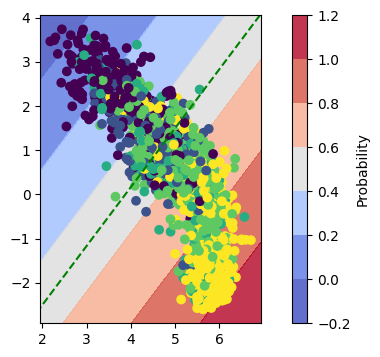

In [11]:
svd = mf.TruncatedSVD(n_components=2, algorithm='arpack').fit(data)
X = svd.transform(data)
V = svd.components_

def predict(params, answers):
    return svd.inverse_transform(params)[:,[int(s) for s in answers]]

predictions = pd.DataFrame(predict(X, data.columns),
                           index=data.index, columns=data.columns)
_ = compute_metric(predictions, train_reactions[100], train_reactions[p].isna().values)

q = 3
fig, ax = plt.subplots(figsize=(8,4))
ax = vis.plotEmbedding(pd.DataFrame(X, index=data.index),  c=data.loc[:,str(q)], ax=ax)
ax = vis.plotFeature(predict, q, ax=ax)
plt.show()

 Fit Accuracy: 0.8084979214056005
 Fit RMSE: 0.2675093924090034
 Imputation Accuracy: 0.8093779228800847
 Imputation RMSE: 0.2672946788243162



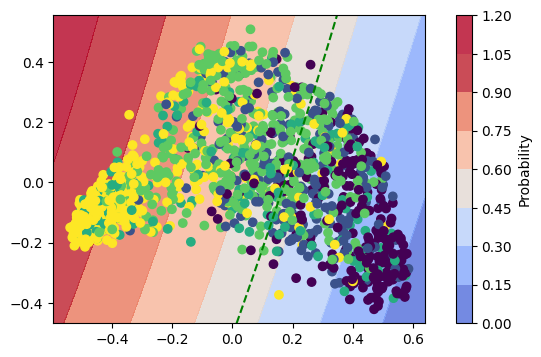

In [13]:
rbf = mf.KernelPCA(n_components=2, kernel='rbf', gamma=0.036, fit_inverse_transform=True).fit(data)
X = rbf.transform(data)

def predict(params, answers):
    return rbf.inverse_transform(params)[:,[int(s) for s in answers]]

predictions = pd.DataFrame(predict(X, data.columns),
                           index=data.index, columns=data.columns)
_ = compute_metric(predictions, train_reactions[100], train_reactions[p].isna().values)

q = 3
fig, ax = plt.subplots(figsize=(8,4))
ax = vis.plotEmbedding(pd.DataFrame(X, index=data.index),  c=data.loc[:,str(q)], ax=ax)
ax = vis.plotFeature(predict, q, ax=ax)
plt.show()

In [15]:
gammas = np.linspace(0,0.1,20)
metrics = []

for g in tqdm(gammas):
    rbf = mf.KernelPCA(n_components=2, kernel='rbf', gamma=g, fit_inverse_transform=True).fit(data)
    X = rbf.transform(data)

    # Calculating dot products
    predictions = pd.DataFrame(predict(X, data.columns),
                               index=data.index, columns=data.columns)
    acc_mse = compute_metric(predictions, train_reactions[100], train_reactions[p].isna().values, silent=True)
    metrics.append(acc_mse)

  0%|          | 0/20 [00:00<?, ?it/s]

(0.03684210526315789, 0.8082529348707088)

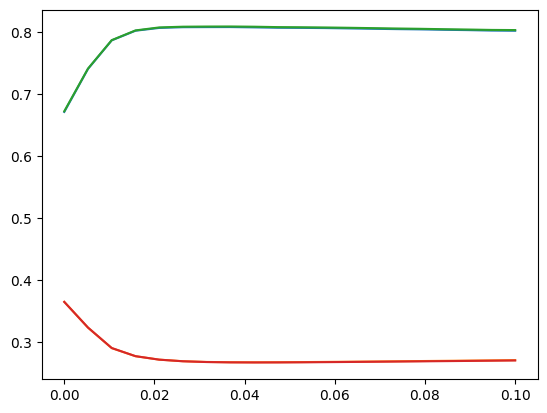

In [16]:
ACC, MSE, GAC, GME = np.array(metrics).T
plt.plot(gammas, ACC)
plt.plot(gammas, MSE)
plt.plot(gammas, GAC)
plt.plot(gammas, GME)

gammas[ACC.argmax()], ACC.max()